# Bài tập thực hành môn Tiền xử lý và xây dựng bộ dữ liệu 

In [1]:
# load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
coronaData=pd.read_csv('data/covid_19_data.csv')
coronaData.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Câu a

In [2]:
#Liệt kê số cột trong bảng dữ liệu
print("Số cột trong bảng dữ liệu",len(coronaData.columns))


Số cột trong bảng dữ liệu 8


In [3]:
#Liệt kê số dòng:
print("Số dòng trong bảng dữ liệu",coronaData.shape[0])


Số dòng trong bảng dữ liệu 306429


In [4]:
#In ra 10 dòng đầu trong bảng dữ liệu
print("10 dòng đầu trong bảng dữ liệu",coronaData.head(10))
#In ra tên các biến (tên cột) của dữ liệu
print("Tên cột của bảng dữ liệu",coronaData.columns)


10 dòng đầu trong bảng dữ liệu    SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   
5    6      01/22/2020      Guangdong  Mainland China  1/22/2020 17:00   
6    7      01/22/2020        Guangxi  Mainland China  1/22/2020 17:00   
7    8      01/22/2020        Guizhou  Mainland China  1/22/2020 17:00   
8    9      01/22/2020         Hainan  Mainland China  1/22/2020 17:00   
9   10      01/22/2020          Hebei  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0

In [5]:
# Tạo biến countryCorona lưu giá trị là các quốc gia có dịch Corona (Cột Country/Region)
countryCorona = coronaData['Country/Region'].unique()
print("Các quốc gia có dịch Corona",countryCorona)

# Liệt kê số lượng ca lây nhiễm được xác nhận (biến Confirmed) nhiều nhất và lưu vào biến maxConfirmedCases
maxConfirmedCases = coronaData['Confirmed'].max()
print("Số lượng ca lây nhiễm được xác nhận nhiều nhất",maxConfirmedCases)
# Liệt kê các dữ liệu về covid-19 tại quốc gia Trung Quốc đại lục (Mainland China) và lưu vào biến coronaChina
coronaChina = coronaData[coronaData['Country/Region'] == 'Mainland China']
print("Các dữ liệu về covid-19 tại quốc gia Trung Quốc đại lục (Mainland China)",coronaChina)
# Tìm quốc gia (Country/Region) có số ca lây nhiễm nhiều nhất
countryMaxConfirmedCases = coronaData[coronaData['Confirmed'] == maxConfirmedCases]['Country/Region']
print("Quốc gia có số ca lây nhiễm nhiều nhất",countryMaxConfirmedCases)
# Tìm tỉnh (Province/State) có số ca lây nhiễm nhiều nhất 
maxConfirmedCasesProvince = coronaData[coronaData['Confirmed'] == maxConfirmedCases]['Province/State']
print("Tỉnh có số ca lây nhiễm nhiều nhất",maxConfirmedCasesProvince)


Các quốc gia có dịch Corona ['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'China' 'Kiribati' 'Singapore' 'Philippines' 'Malaysia'
 'Vietnam' 'Australia' 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal'
 'Canada' 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland'
 'United Arab Emirates' 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain'
 'Belgium' 'Others' 'Egypt' 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman'
 'Afghanistan' 'Bahrain' 'Kuwait' 'Austria' 'Algeria' 'Croatia'
 'Switzerland' 'Pakistan' 'Georgia' 'Greece' 'North Macedonia' 'Norway'
 'Romania' 'Denmark' 'Estonia' 'Netherlands' 'San Marino' ' Azerbaijan'
 'Belarus' 'Iceland' 'Lithuania' 'New Zealand' 'Nigeria' 'North Ireland'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan'
 'Czech Republic' 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal'
 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile'
 'Jordan' 'Ukraine' 'Saint Barthelemy' 'Hungary' 'Faroe Islands

In [6]:
# Lấy dữ liệu theo ngày tháng
# Định dạng lại cột dữ liệu ngày tháng
coronaData['ObservationDate'] = pd.to_datetime(coronaData['ObservationDate'])

# Lấy dữ liệu trong tháng 1/2020, bắt đầu từ 01/01/2020 đến 31/01/2020
coronaDataJan = coronaData[(coronaData['ObservationDate'] >= '2020-01-01') & (coronaData['ObservationDate'] <= '2020-01-31')]

# In ra số lượng các dòng dữ liệu trong tháng 1
print("Số dòng dữ liệu trong tháng 1/2020:", coronaDataJan.shape[0])

# Thống kê dữ liệu tháng 1
# Hiển thị thông tin thống kê cơ bản của tháng 1
print("Thống kê dữ liệu tháng 1/2020:")
print(coronaDataJan.describe())



Số dòng dữ liệu trong tháng 1/2020: 513
Thống kê dữ liệu tháng 1/2020:
              SNo                ObservationDate    Confirmed      Deaths  \
count  513.000000                            513   513.000000  513.000000   
mean   257.000000  2020-01-26 21:11:34.736841984    75.984405    1.764133   
min      1.000000            2020-01-22 00:00:00     0.000000    0.000000   
25%    129.000000            2020-01-24 00:00:00     2.000000    0.000000   
50%    257.000000            2020-01-27 00:00:00     7.000000    0.000000   
75%    385.000000            2020-01-29 00:00:00    33.000000    0.000000   
max    513.000000            2020-01-31 00:00:00  5806.000000  204.000000   
std    148.234611                            NaN   412.819242   14.596959   

        Recovered  
count  513.000000  
mean     1.748538  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max    141.000000  
std      9.878615  


In [7]:
# Tính tổng số ca nhiễm (Confirmed) trong tháng 1
totalConfirmedJan = coronaDataJan['Confirmed'].sum()
print("Tổng số ca nhiễm trong tháng 1/2020:", totalConfirmedJan)

# Tính tổng số ca tử vong (Deaths) trong tháng 1
totalDeathsJan = coronaDataJan['Deaths'].sum()
print("Tổng số ca tử vong trong tháng 1/2020:", totalDeathsJan)

# Tính tổng số ca hồi phục (Recovered) trong tháng 1
totalRecoveredJan = coronaDataJan['Recovered'].sum()
print("Tổng số ca hồi phục trong tháng 1/2020:", totalRecoveredJan)



Tổng số ca nhiễm trong tháng 1/2020: 38980.0
Tổng số ca tử vong trong tháng 1/2020: 905.0
Tổng số ca hồi phục trong tháng 1/2020: 897.0


In [8]:
# Thống kê theo quốc gia trong tháng 1
# Nhóm dữ liệu theo quốc gia và tính tổng các chỉ số
countryStatsJan = coronaDataJan.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Hiển thị 10 quốc gia có số ca nhiễm cao nhất trong tháng 1
print("10 quốc gia có số ca nhiễm cao nhất trong tháng 1/2020:")
print(countryStatsJan.sort_values('Confirmed', ascending=False).head(10))

10 quốc gia có số ca nhiễm cao nhất trong tháng 1/2020:
    Country/Region  Confirmed  Deaths  Recovered
16  Mainland China    38340.0   905.0      838.0
27        Thailand       96.0     0.0       49.0
9        Hong Kong       65.0     0.0        0.0
13           Japan       55.0     0.0        6.0
22       Singapore       53.0     0.0        0.0
26          Taiwan       52.0     0.0        0.0
15           Macau       46.0     0.0        0.0
0        Australia       41.0     0.0        4.0
17        Malaysia       38.0     0.0        0.0
29              US       37.0     0.0        0.0


## Câu b

In [9]:
## Tìm dữ liệu về số ca lây nhiễm tại Vietnam (Country.Region == 'Vietnam') và lưu vào biến coronaVietnam
coronaVietnam = coronaData[coronaData['Country/Region'] == 'Vietnam']

In [10]:
coronaVietnam

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
81,82,2020-01-23,NaN,Vietnam,1/23/20 17:00,2.0,0.0,0.0
127,128,2020-01-24,NaN,Vietnam,1/24/20 17:00,2.0,0.0,0.0
170,171,2020-01-25,NaN,Vietnam,1/25/20 17:00,2.0,0.0,0.0
218,219,2020-01-26,NaN,Vietnam,1/26/20 16:00,2.0,0.0,0.0
267,268,2020-01-27,NaN,Vietnam,1/27/20 23:59,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
302771,302772,2021-05-25,NaN,Vietnam,2021-05-26 04:20:35,5931.0,44.0,2794.0
303536,303537,2021-05-26,NaN,Vietnam,2021-05-27 04:20:59,6086.0,45.0,2853.0
304301,304302,2021-05-27,NaN,Vietnam,2021-05-28 04:20:36,6356.0,46.0,2853.0
305066,305067,2021-05-28,NaN,Vietnam,2021-05-29 04:20:41,6396.0,47.0,2896.0


## Câu c

In [11]:
# Tìm dữ liệu về số ca lây nhiễm tại Việt Nam trong tháng 02 năm 2021.
coronaVietnamFeb = coronaData[(coronaData['Country/Region'] == 'Vietnam') & (coronaData['ObservationDate'] >= '2021-02-01') & (coronaData['ObservationDate'] <= '2021-02-28')]


In [12]:
print("Số ca lây nhiễm tại Việt Nam trong tháng 02 năm 2021:", coronaVietnamFeb.shape[0])


Số ca lây nhiễm tại Việt Nam trong tháng 02 năm 2021: 28


## Câu d

In [13]:
# In ra số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Việt Nam (Lấy năm 2021).

coronaVietnamJanFeb = coronaData[(coronaData['Country/Region'] == 'Vietnam') & (coronaData['ObservationDate'] >= '2021-01-01') & (coronaData['ObservationDate'] <= '2021-02-28')]
print("Số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Việt Nam (Lấy năm 2021):", coronaVietnamJanFeb.shape[0])


Số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Việt Nam (Lấy năm 2021): 59


## Câu e

In [14]:
#Thực hiện tương tự câu d) cho Indonesia và Philipine.

coronaIndonesiaJanFeb = coronaData[(coronaData['Country/Region'] == 'Indonesia') & (coronaData['ObservationDate'] >= '2021-01-01') & (coronaData['ObservationDate'] <= '2021-02-28')]
print("Số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Indonesia (Lấy năm 2021):", coronaIndonesiaJanFeb.shape[0])

coronaPhilipineJanFeb = coronaData[(coronaData['Country/Region'] == 'Philipine') & (coronaData['ObservationDate'] >= '2021-01-01') & (coronaData['ObservationDate'] <= '2021-02-28')]
print("Số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Philipine (Lấy năm 2021):", coronaPhilipineJanFeb.shape[0])



Số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Indonesia (Lấy năm 2021): 59
Số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Philipine (Lấy năm 2021): 0


## Câu f

In [15]:
# Thống kê số lượng record theo từng tỉnh của Trung Quốc trong tháng 02/2021.
# Gợi ý: Dùng hàm table(). Đếm từng dòng theo từng tỉnh.
# Lọc dữ liệu cho Trung Quốc (Mainland China) trong tháng 02/2021
coronaChinaFeb = coronaData[(coronaData['Country/Region'] == 'Mainland China') & 
                           (coronaData['ObservationDate'] >= '2021-02-01') & 
                           (coronaData['ObservationDate'] <= '2021-02-28')]

# Thống kê số lượng record theo từng tỉnh
province_counts = coronaChinaFeb['Province/State'].value_counts()

# Hiển thị kết quả
print("Thống kê số lượng record theo từng tỉnh của Trung Quốc trong tháng 02/2021:")
print(province_counts)

# Hiển thị tổng số record
print(f"\nTổng số record: {len(coronaChinaFeb)}")


## Câu g
# Thống kê số lượng record theo từng tỉnh của Trung Quốc trong tháng 02/2021.


Thống kê số lượng record theo từng tỉnh của Trung Quốc trong tháng 02/2021:
Province/State
Anhui             28
Beijing           28
Yunnan            28
Xinjiang          28
Unknown           28
Tibet             28
Tianjin           28
Sichuan           28
Shanxi            28
Shanghai          28
Shandong          28
Shaanxi           28
Qinghai           28
Ningxia           28
Liaoning          28
Jilin             28
Jiangxi           28
Jiangsu           28
Inner Mongolia    28
Hunan             28
Hubei             28
Henan             28
Heilongjiang      28
Hebei             28
Hainan            28
Guizhou           28
Guangxi           28
Guangdong         28
Gansu             28
Fujian            28
Chongqing         28
Zhejiang          28
Name: count, dtype: int64

Tổng số record: 896


## Câu g

In [16]:
# Đếm số lượng ca nhiễm mới theo từng tỉnh của Trung Quốc trong tháng 02/2021.
coronaChinaFeb = coronaData[(coronaData['Country/Region'] == 'Mainland China') & 
                           (coronaData['ObservationDate'] >= '2021-02-01') & 
                           (coronaData['ObservationDate'] <= '2021-02-28')]

# Nhóm dữ liệu theo tỉnh và tính tổng số ca nhiễm
province_confirmed_cases = coronaChinaFeb.groupby('Province/State')['Confirmed'].sum()

# Hiển thị kết quả
print("Số lượng ca nhiễm theo từng tỉnh của Trung Quốc trong tháng 02/2021:")
print(province_confirmed_cases)

# Hiển thị tổng số ca nhiễm
print(f"\nTổng số ca nhiễm: {province_confirmed_cases.sum()}")



Số lượng ca nhiễm theo từng tỉnh của Trung Quốc trong tháng 02/2021:
Province/State
Anhui               27832.0
Beijing             29278.0
Chongqing           16548.0
Fujian              15323.0
Gansu                5236.0
Guangdong           60700.0
Guangxi              7476.0
Guizhou              4116.0
Hainan               4788.0
Hebei               36858.0
Heilongjiang        45023.0
Henan               36499.0
Hubei             1908212.0
Hunan               28948.0
Inner Mongolia      10264.0
Jiangsu             19661.0
Jiangxi             26180.0
Jilin               16011.0
Liaoning            11310.0
Ningxia              2100.0
Qinghai               504.0
Shaanxi             15268.0
Shandong            24280.0
Shanghai            49269.0
Shanxi               6699.0
Sichuan             24659.0
Tianjin              9779.0
Tibet                  28.0
Unknown                 1.0
Xinjiang            27440.0
Yunnan               6472.0
Zhejiang            36935.0
Name: Confirmed, dty

In [17]:
# Thực hiện tương tự cho các quốc gia khác, ví dụ như Nhật Bản (Japan).
# Lọc dữ liệu cho Nhật Bản (Japan) trong tháng 02/2021
coronaJapanFeb = coronaData[(coronaData['Country/Region'] == 'Japan') & 
                           (coronaData['ObservationDate'] >= '2021-02-01') & 
                           (coronaData['ObservationDate'] <= '2021-02-28')]

# Thống kê số lượng record theo từng tỉnh (nếu có)
japan_province_counts = coronaJapanFeb['Province/State'].value_counts()

print("Thống kê số lượng record theo từng tỉnh của Nhật Bản trong tháng 02/2021:")
print(japan_province_counts)
print(f"\nTổng số record: {len(coronaJapanFeb)}")

# Nhóm dữ liệu theo tỉnh (nếu có) và tính tổng số ca nhiễm
japan_confirmed_cases = coronaJapanFeb.groupby('Province/State')['Confirmed'].sum()

print("\nSố lượng ca nhiễm theo từng tỉnh của Nhật Bản trong tháng 02/2021:")
print(japan_confirmed_cases)
print(f"\nTổng số ca nhiễm: {japan_confirmed_cases.sum()}")



Thống kê số lượng record theo từng tỉnh của Nhật Bản trong tháng 02/2021:
Province/State
Aichi              28
Nagano             28
Nara               28
Niigata            28
Oita               28
Okayama            28
Okinawa            28
Osaka              28
Port Quarantine    28
Saga               28
Saitama            28
Shiga              28
Shimane            28
Shizuoka           28
Tochigi            28
Tokushima          28
Tokyo              28
Tottori            28
Toyama             28
Unknown            28
Wakayama           28
Yamagata           28
Yamaguchi          28
Nagasaki           28
Miyazaki           28
Akita              28
Miyagi             28
Aomori             28
Chiba              28
Ehime              28
Fukui              28
Fukuoka            28
Fukushima          28
Gifu               28
Gunma              28
Hiroshima          28
Hokkaido           28
Hyogo              28
Ibaraki            28
Ishikawa           28
Iwate              28
Kagawa   

## Câu h

In [26]:
# Tìm dữ liệu ca tử vong của Trung Quốc trong khoảng thời gian từ 01/02/2021 cho đến 15/02/2021. In ra màn hình sử dụng lệnh print().
coronaChinaFeb = coronaData[(coronaData['Country/Region'] == 'Mainland China') & 
                           (coronaData['ObservationDate'] >= '2021-02-01') & 
                           (coronaData['ObservationDate'] <= '2021-02-15')]
coronaChinaFebDeath = coronaChinaFeb['Deaths']
print("Dữ liệu ca tử vong của Trung Quốc trong khoảng thời gian từ 01/02/2021 cho đến 15/02/2021:")
print(coronaChinaFebDeath)

Dữ liệu ca tử vong của Trung Quốc trong khoảng thời gian từ 01/02/2021 cho đến 15/02/2021:
216353    6.0
216387    9.0
216437    6.0
216479    1.0
216484    2.0
         ... 
227545    0.0
227573    0.0
227617    3.0
227625    2.0
227631    1.0
Name: Deaths, Length: 480, dtype: float64


## Câu i

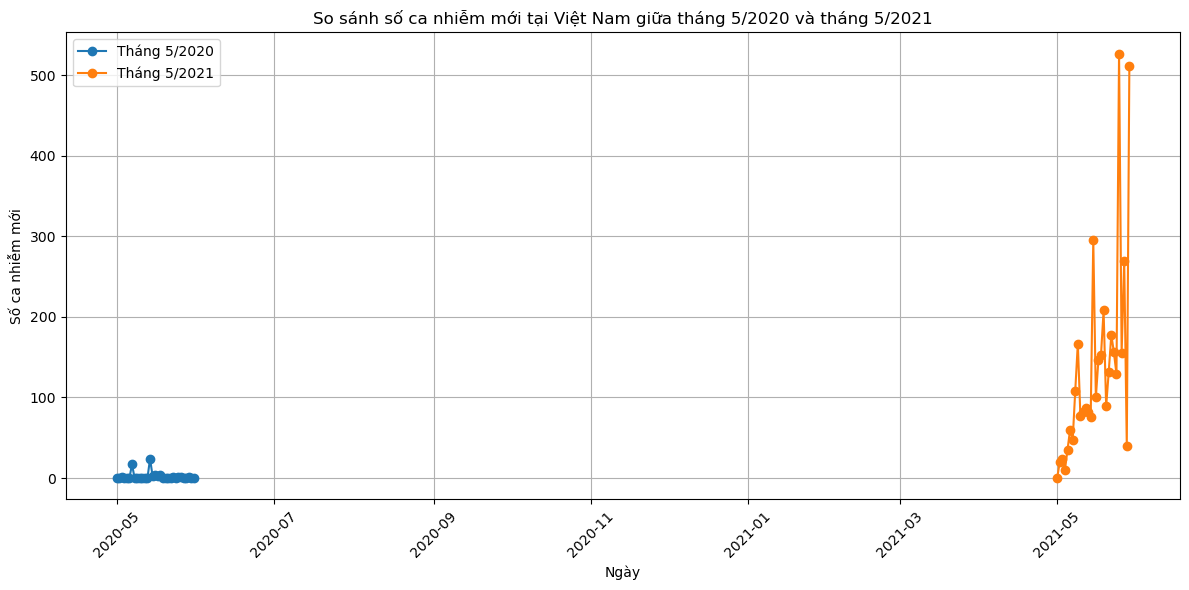

Tổng số ca nhiễm mới tại Việt Nam trong tháng 5/2020: 58.0
Tổng số ca nhiễm mới tại Việt Nam trong tháng 5/2021: 3966.0
Tỷ lệ tăng: 68.37931034482759

Nhận xét:
- Số ca nhiễm mới tại Việt Nam trong tháng 5/2021 tăng đáng kể so với tháng 5/2020
- Tháng 5/2020, Việt Nam kiểm soát dịch tốt với rất ít ca nhiễm mới
- Tháng 5/2021 đánh dấu sự bùng phát của làn sóng dịch mới với số ca nhiễm tăng mạnh


In [19]:
# Có nhận xét gì về số ca nhiễm mới tại Việt Nam giữa tháng 05/2020 và tháng 05/2021. Vẽ biểu đồ đường thể hiện số ca nhiễm mới trong 2 tháng trên.
# Lọc dữ liệu cho Việt Nam trong tháng 05/2020 và tháng 05/2021
vietnam_data_may_2020 = coronaData[(coronaData['Country/Region'] == 'Vietnam') & 
                                   (coronaData['ObservationDate'] >= '2020-05-01') & 
                                   (coronaData['ObservationDate'] <= '2020-05-31')]


vietnam_data_may_2021 = coronaData[(coronaData['Country/Region'] == 'Vietnam') & 
                                   (coronaData['ObservationDate'] >= '2021-05-01') & 
                                   (coronaData['ObservationDate'] <= '2021-05-31')]

# Sắp xếp dữ liệu theo ngày
vietnam_data_may_2020 = vietnam_data_may_2020.sort_values('ObservationDate')
vietnam_data_may_2021 = vietnam_data_may_2021.sort_values('ObservationDate')

# Tính số ca nhiễm mới hàng ngày
vietnam_may_2020_daily = vietnam_data_may_2020.copy()
vietnam_may_2021_daily = vietnam_data_may_2021.copy()

# Tính số ca nhiễm mới bằng cách lấy sự khác biệt giữa các ngày liên tiếp
vietnam_may_2020_daily['New_Cases'] = vietnam_may_2020_daily['Confirmed'].diff().fillna(0)
vietnam_may_2021_daily['New_Cases'] = vietnam_may_2021_daily['Confirmed'].diff().fillna(0)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(vietnam_may_2020_daily['ObservationDate'], vietnam_may_2020_daily['New_Cases'], 
         label='Tháng 5/2020', marker='o')
plt.plot(vietnam_may_2021_daily['ObservationDate'], vietnam_may_2021_daily['New_Cases'], 
         label='Tháng 5/2021', marker='o')

plt.title('So sánh số ca nhiễm mới tại Việt Nam giữa tháng 5/2020 và tháng 5/2021')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tính tổng số ca nhiễm mới trong mỗi tháng
total_new_cases_may_2020 = vietnam_may_2020_daily['New_Cases'].sum()
total_new_cases_may_2021 = vietnam_may_2021_daily['New_Cases'].sum()

print(f"Tổng số ca nhiễm mới tại Việt Nam trong tháng 5/2020: {total_new_cases_may_2020}")
print(f"Tổng số ca nhiễm mới tại Việt Nam trong tháng 5/2021: {total_new_cases_may_2021}")
print(f"Tỷ lệ tăng: {(total_new_cases_may_2021 / total_new_cases_may_2020 if total_new_cases_may_2020 > 0 else 'N/A')}")

print("\nNhận xét:")
print("- Số ca nhiễm mới tại Việt Nam trong tháng 5/2021 tăng đáng kể so với tháng 5/2020")
print("- Tháng 5/2020, Việt Nam kiểm soát dịch tốt với rất ít ca nhiễm mới")
print("- Tháng 5/2021 đánh dấu sự bùng phát của làn sóng dịch mới với số ca nhiễm tăng mạnh")



## Câu k

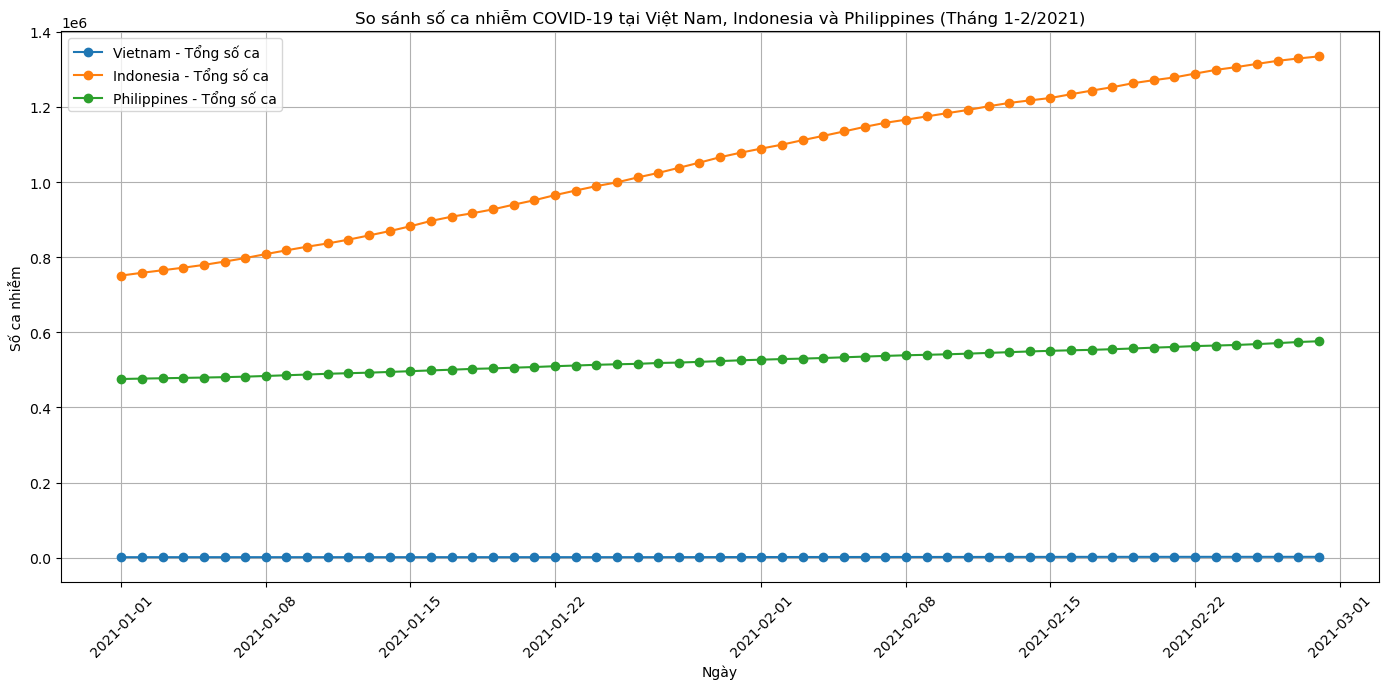

Thống kê số ca nhiễm COVID-19 (Tháng 1-2/2021):
Vietnam: Số ca nhiễm cao nhất là 2448.0 vào ngày 2021-02-28 00:00:00
Indonesia: Số ca nhiễm cao nhất là 1334634.0 vào ngày 2021-02-28 00:00:00
Philippines: Số ca nhiễm cao nhất là 576352.0 vào ngày 2021-02-28 00:00:00


In [20]:
# Vẽ biểu đồ về số ca lây nhiễm nhiều nhất của 3 quốc gia: Vietnam, Indonesia và Philippine trong 2 tháng gồm 01 và tháng 02 năm 2021
# Lọc dữ liệu cho 3 quốc gia trong tháng 01 và tháng 02 năm 2021
vietnam_data_jan_feb_2021 = coronaData[(coronaData['Country/Region'].isin(['Vietnam', 'Indonesia', 'Philippines'])) & 
                                        (coronaData['ObservationDate'] >= '2021-01-01') & 
                                        (coronaData['ObservationDate'] <= '2021-02-28')]

# Nhóm dữ liệu theo quốc gia và ngày, lấy số ca nhiễm theo ngày
country_daily_cases = vietnam_data_jan_feb_2021.groupby(['Country/Region', 'ObservationDate'])['Confirmed'].max().reset_index()

# Tạo pivot table để dễ dàng vẽ biểu đồ
pivot_data = country_daily_cases.pivot(index='ObservationDate', columns='Country/Region', values='Confirmed')

# Tính số ca nhiễm mới hàng ngày bằng cách lấy sự khác biệt
new_cases = pivot_data.diff().fillna(0)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

# Vẽ đường cho từng quốc gia
for country in ['Vietnam', 'Indonesia', 'Philippines']:
    if country in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[country], marker='o', linestyle='-', label=f'{country} - Tổng số ca')

plt.title('So sánh số ca nhiễm COVID-19 tại Việt Nam, Indonesia và Philippines (Tháng 1-2/2021)')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hiển thị thông tin thống kê
print("Thống kê số ca nhiễm COVID-19 (Tháng 1-2/2021):")
for country in ['Vietnam', 'Indonesia', 'Philippines']:
    if country in pivot_data.columns:
        max_cases = pivot_data[country].max()
        max_date = pivot_data[country].idxmax()
        print(f"{country}: Số ca nhiễm cao nhất là {max_cases} vào ngày {max_date}")



